In [ ]:
import pandas as pd
import numpy as np

urineDS=pd.read_csv("/content/drive/MyDrive/Grad2/lastUrine.csv")
urineDS=urineDS.iloc[:,1:]

from sklearn.preprocessing import StandardScaler


urineOutput=urineDS.iloc[2:,0:1]
urineInput=urineDS.iloc[2:,4:]

data = urineInput
scaler = StandardScaler()
scaler.fit(data)
urineInput=scaler.transform(data)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(urineInput, urineOutput, test_size=0.33, random_state=0)

In [ ]:
X_train=X_train.astype(np.float64)
X_test=X_test.astype(np.float64)
y_train=y_train.astype(np.float64)-1
y_test=y_test.astype(np.float64)-1

print(y_train)

     Metadata
231       1.0
20        1.0
169       0.0
254       1.0
126       0.0
..        ...
253       0.0
194       0.0
119       1.0
49        1.0
174       1.0

[201 rows x 1 columns]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, MaxPooling1D, Flatten,concatenate

from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
import keras
from matplotlib import pyplot as plt

model = Sequential()
model.add(Conv1D(256, 3, activation='relu', input_shape=(529, 1)))
model.add(Conv1D(256, 3, activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 2, activation='relu'))
model.add(MaxPooling1D(1))
model.add(Dropout(0.25))
model.add(Conv1D(64, 1, activation='relu'))
model.add(MaxPooling1D(1))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Epoch 1/7
6/6 [==============================] - 5s 615ms/step - loss: 4.2453 - accuracy: 0.4667 - val_loss: 0.9192 - val_accuracy: 0.5714
Epoch 2/7
6/6 [==============================] - 3s 561ms/step - loss: 3.7495 - accuracy: 0.5778 - val_loss: 0.6982 - val_accuracy: 0.5714
Epoch 3/7
6/6 [==============================] - 3s 568ms/step - loss: 0.8620 - accuracy: 0.5722 - val_loss: 0.5708 - val_accuracy: 0.7143
Epoch 4/7
6/6 [==============================] - 3s 570ms/step - loss: 0.5854 - accuracy: 0.6889 - val_loss: 0.6557 - val_accuracy: 0.5714
Epoch 5/7
6/6 [==============================] - 3s 574ms/step - loss: 0.5547 - accuracy: 0.6889 - val_loss: 0.5381 - val_accuracy: 0.6190
Epoch 6/7
6/6 [==============================] - 3s 573ms/step - loss: 0.4555 - accuracy: 0.7833 - val_loss: 0.4208 - val_accuracy: 0.7619
Epoch 7/7
6/6 [==============================] - 3s 571ms/step - loss: 0.4217 - accuracy: 0.8444 - val_loss: 0.4326 - val_accuracy: 0.7619


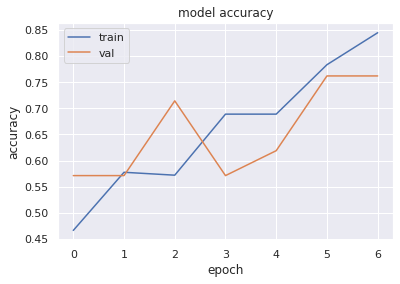

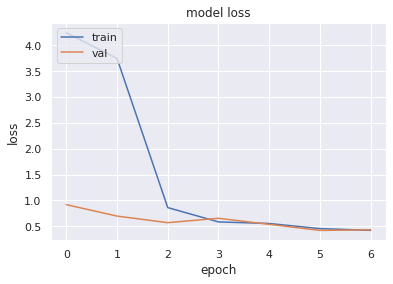

In [ ]:
history =model.fit(X_train,y_train, batch_size=32, epochs=7, validation_split=0.1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)
model.save('/content/drive/MyDrive/Grad2Models/cinsiyetEarly')

2.8.2
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Grad2Models/cinsiyetEarly/assets


In [ ]:
import os

import tensorflow as tf
from tensorflow import keras
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Grad2Models/cinsiyetEarly', compile=False)

# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 527, 256)          1024      
                                                                 
 conv1d_5 (Conv1D)           (None, 525, 256)          196864    
                                                                 
 dropout_3 (Dropout)         (None, 525, 256)          0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 262, 256)         0         
 1D)                                                             
                                                                 
 conv1d_6 (Conv1D)           (None, 261, 128)          65664     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 261, 128)         0         
 1D)                                                  

In [ ]:
prediction=new_model.predict(X_test)

for i in range (prediction.shape[0]):
  if prediction[i]< 0.5:
    prediction[i]=0
  else:
    prediction[i]=1  
    

yout=y_test.to_numpy()    
counter=0


for i in range (prediction.shape[0]):
  print("pred",prediction[i],"---- Real",yout[i])
  if prediction[i] == yout[i] :
    counter=counter+1


print("Accuracy is ",counter,"%")

pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [1.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [1.] ---- Real [1.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [1.] ---- Real [1.]
pred [1.] ---- Real [1.]
pred [1.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [1.]
pred [1.] ---- Real [1.]
pred [0.] ---- Real [0.]
pred [0.] ---- Real [0.]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()
cm = confusion_matrix(yout, prediction)

Text(0.5, 12.5, 'Predicted label')

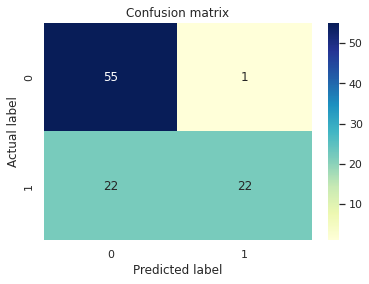

In [ ]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(yout,prediction))

              precision    recall  f1-score   support

         0.0       0.71      0.98      0.83        56
         1.0       0.96      0.50      0.66        44

    accuracy                           0.77       100
   macro avg       0.84      0.74      0.74       100
weighted avg       0.82      0.77      0.75       100



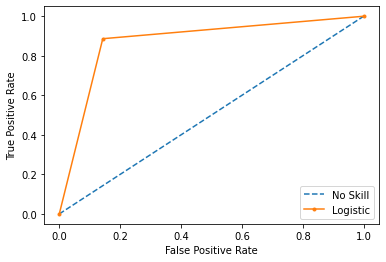

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(yout))]

ns_auc = roc_auc_score(yout, ns_probs)
lr_auc = roc_auc_score(yout, prediction)

ns_fpr, ns_tpr, _ = roc_curve(yout, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(yout, prediction)

pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()